In [1]:
## importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve,auc

from scipy.io import arff
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = arff.loadarff('Training Dataset.arff')  # loading dataset
df = pd.DataFrame(data[0])                     # converting the data to a dataframe
for i in df:                                   # converting categorical objects to integers
    df.loc[:,i] = df.loc[:,i].astype(int)
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [3]:
## separating label/target from features( separating X from y )
X = df.drop('Result', axis=1)
X.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1


In [4]:
y = df['Result']
y.head()

0   -1
1   -1
2   -1
3   -1
4    1
Name: Result, dtype: int32

In [5]:
## now we can split X and y into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=df['Result'])
## random state is set to zero to ensure reproduciability
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (7738, 30)
y_train (7738,)
X_test (3317, 30)
y_test (3317,)


In [6]:
# dealing with class imbalance with the SMOTE
from imblearn.over_sampling import SMOTE

# Create SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print('X_train_resampled', X_train_resampled.shape)
print('y_train', y_train_resampled.shape)

X_train_resampled (8620, 30)
y_train (8620,)


## Applying Random Forest Classifier

In [7]:
## create rf model object
## fit the model
rf_classifier = RandomForestClassifier(n_estimators=8, criterion='entropy', random_state=0)
rf_classifier.fit(X_train_resampled, y_train_resampled)  



RandomForestClassifier(criterion='entropy', n_estimators=8, random_state=0)

In [8]:
## make predictions with X_test
y_pred_rf = rf_classifier.predict(X_test)
y_pred_rf 

array([ 1,  1, -1, ...,  1,  1, -1])

In [9]:
## evaluation with confusion matrix
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)
print(conf_mat_rf)

[[1415   55]
 [  49 1798]]


Text(0.5, 427.9555555555555, 'Predicted label')

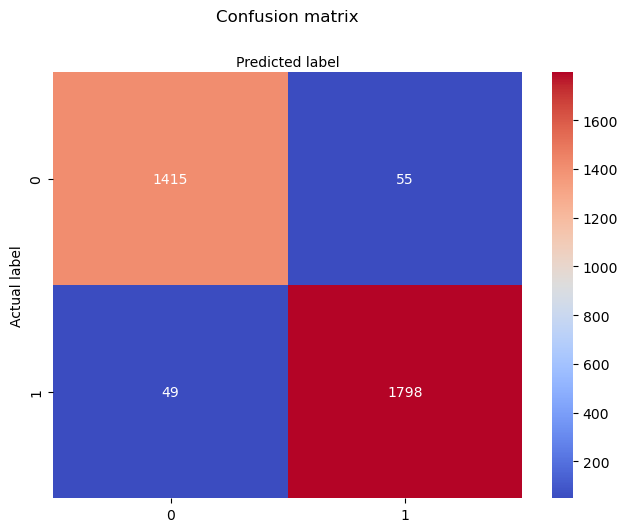

In [10]:
## visualizing the confusion matrix
## visualize the confusion matrix
class_names=[-1,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# creating heatmap
sns.heatmap(pd.DataFrame(conf_mat_rf), annot=True,cmap='coolwarm', fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [11]:
## accuracy , precison and recall score report
print("Accuracy", metrics.accuracy_score(y_test, y_pred_rf))
print("Precision", metrics.precision_score(y_test, y_pred_rf))
print("Recall", metrics.recall_score(y_test, y_pred_rf))

Accuracy 0.9686463671992764
Precision 0.9703184025903939
Recall 0.9734704926908501


In [12]:
## checking precision recall, and accuracy
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

          -1       0.97      0.96      0.96      1470
           1       0.97      0.97      0.97      1847

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



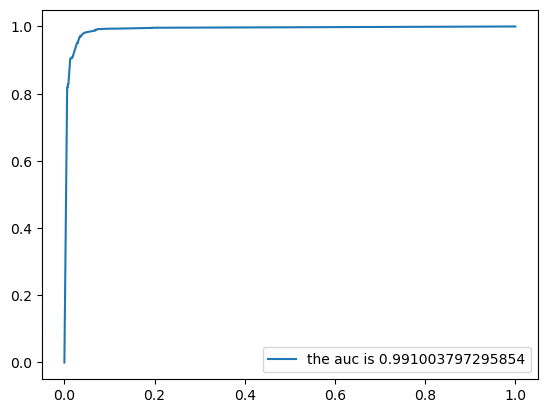

In [13]:
## ploting ROC curve
## ploting ROC curve
prob_y_pred = rf_classifier.predict_proba(X_test)[::,1]  ## why the ::
fpr, tpr, _ = metrics.roc_curve(y_test, prob_y_pred)  ## why the underscore?
auc = metrics.roc_auc_score(y_test, prob_y_pred)
plt.plot(fpr, tpr, label='the auc is ' + str(auc))
plt.legend(loc=4)
plt.show()

## Applying XGboost Classifier

In [14]:
y_train_xgb = np.where(y_train_resampled == -1, 0, y_train_resampled) ## converting -1 class to zero since xgboostclassifier expects o or 1
y_test_xgb =  np.where(y_test == -1, 0, y_test)
## training and making predictions
xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train_resampled, y_train_xgb)
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb

array([1, 1, 1, ..., 1, 1, 0])

In [15]:
## evaluation with confusion matrix
conf_mat_xgb = confusion_matrix(y_test_xgb, y_pred_xgb)
print(conf_mat_xgb)

[[1417   53]
 [  46 1801]]


Text(0.5, 427.9555555555555, 'Predicted label')

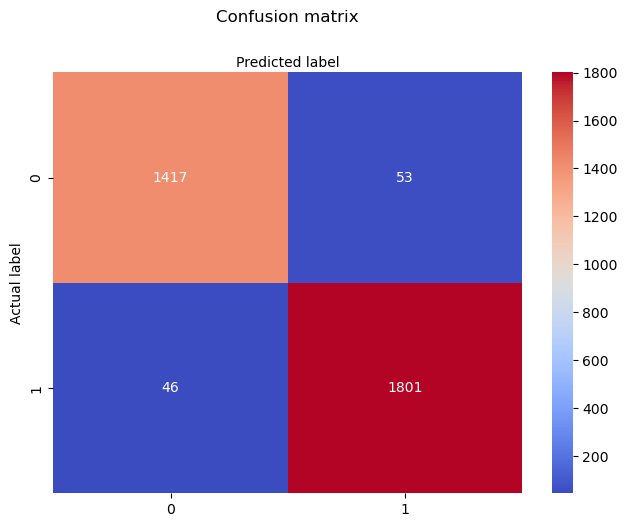

In [16]:
## visualizing the confusion matrix
## visualize the confusion matrix
class_names=[-1,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# creating heatmap
sns.heatmap(pd.DataFrame(conf_mat_xgb), annot=True,cmap='coolwarm', fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [17]:
## accuracy , precison and recall score report
print("Accuracy", metrics.accuracy_score(y_test_xgb, y_pred_xgb))
print("Precision", metrics.precision_score(y_test_xgb, y_pred_xgb))
print("Recall", metrics.recall_score(y_test_xgb, y_pred_xgb))

Accuracy 0.9701537533916189
Precision 0.9714131607335491
Recall 0.9750947482403898


In [18]:
## checking precision recall, and accuracy
print(classification_report(y_test_xgb, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1470
           1       0.97      0.98      0.97      1847

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



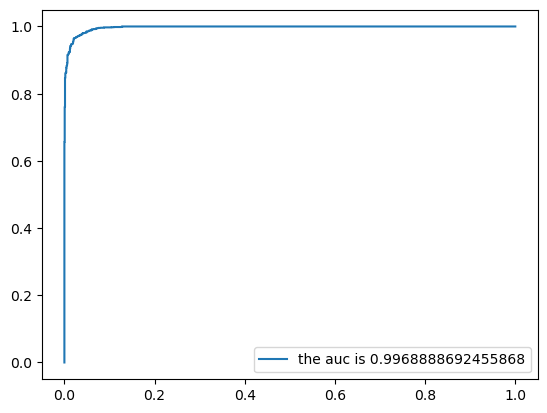

In [19]:
## ploting ROC curve
prob_y_pred = xgb.predict_proba(X_test)[::,1]  
fpr, tpr, _ = metrics.roc_curve(y_test, prob_y_pred) 
auc = metrics.roc_auc_score(y_test, prob_y_pred)
plt.plot(fpr, tpr, label='the auc is ' + str(auc))
plt.legend(loc=4)
plt.show()

###  Applying Logistic regression to mae predictions

In [20]:
logistic_reg = LogisticRegression()  # creating an instance of LogisticRegression classifier
logistic_reg.fit(X_train_resampled, y_train_resampled)   # fitting the model
y_pred_logistic_reg = logistic_reg.predict(X_test)  # make predictions

In [21]:
## Evaluation with confusion matrix
conf_mat_logistic_reg = metrics.confusion_matrix(y_test, y_pred_logistic_reg)
conf_mat_logistic_reg

array([[1359,  111],
       [ 123, 1724]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

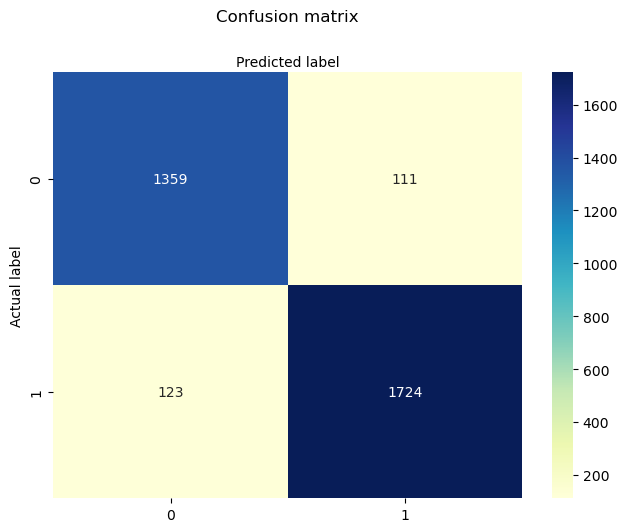

In [22]:
## visualizing the confusion matrix
class_names=[-1, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# creating heatmap
sns.heatmap(pd.DataFrame(conf_mat_logistic_reg), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [23]:
## accuracy , precison and recall score report
print("Accuracy", metrics.accuracy_score(y_test, y_pred_logistic_reg))
print("Precision", metrics.precision_score(y_test, y_pred_logistic_reg))
print("Recall", metrics.recall_score(y_test, y_pred_logistic_reg))

Accuracy 0.929454326198372
Precision 0.9395095367847411
Recall 0.9334055224688684


In [24]:
## checking precision recall, and accuracy report
print(classification_report(y_test, y_pred_logistic_reg))

              precision    recall  f1-score   support

          -1       0.92      0.92      0.92      1470
           1       0.94      0.93      0.94      1847

    accuracy                           0.93      3317
   macro avg       0.93      0.93      0.93      3317
weighted avg       0.93      0.93      0.93      3317



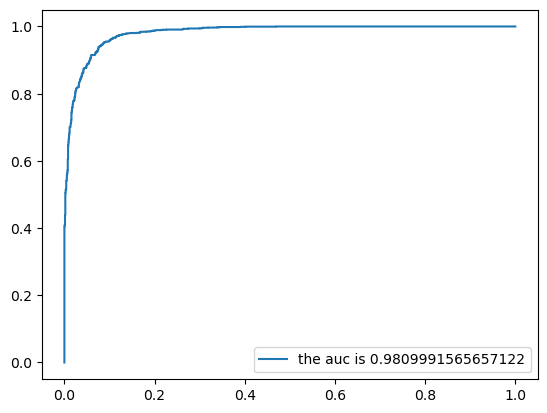

In [25]:
## ploting ROC curve
prob_y_pred_logistic_reg = logistic_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, prob_y_pred_logistic_reg)  ## why the underscore?
auc = metrics.roc_auc_score(y_test, prob_y_pred_logistic_reg)
plt.plot(fpr, tpr, label='the auc is ' + str(auc))
plt.legend(loc=4)
plt.show()

### Applying Support vector machines(SVM)

In [26]:
svc = SVC(kernel='linear', C = 0.025) #C is the regularization parameter
svc.fit(X_train_resampled, y_train_resampled)             # fiting the svm model
y_pred_svm = svc.predict(X_test)      # making predictions

In [27]:
## Evaluation with confusion matrix
conf_mat_svm = metrics.confusion_matrix(y_test, y_pred_svm)
conf_mat_svm

array([[1361,  109],
       [ 100, 1747]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

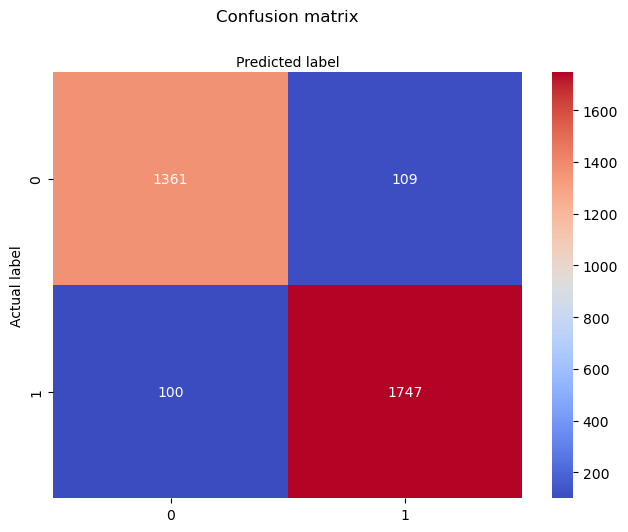

In [28]:
## visualize confusion matrix
class_names=[-1, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# creating heatmap
sns.heatmap(pd.DataFrame(conf_mat_svm), annot=True, cmap='coolwarm', fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [29]:
## accuracy , precison and recall score report
print("Accuracy", metrics.accuracy_score(y_test, y_pred_svm))
print("Precision", metrics.precision_score(y_test, y_pred_svm))
print("Recall", metrics.recall_score(y_test, y_pred_svm))

Accuracy 0.9369912571600845
Precision 0.9412715517241379
Recall 0.9458581483486735


In [30]:
## checking precision recall, and accuracy report
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

          -1       0.93      0.93      0.93      1470
           1       0.94      0.95      0.94      1847

    accuracy                           0.94      3317
   macro avg       0.94      0.94      0.94      3317
weighted avg       0.94      0.94      0.94      3317



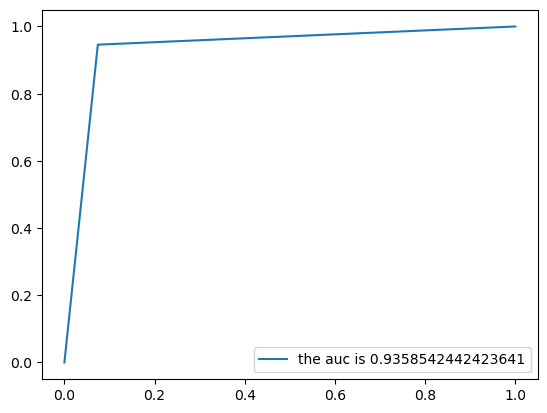

In [31]:
## ploting ROC curve
fpr,tpr,thresh = roc_curve(y_test, y_pred_svm)
#roc_auc = accuracy_score(y_test, y_pred_svm)

#fpr, tpr, _ = metrics.roc_curve(y_test, prob_y_pred_logistic_reg)  ## why the underscore?
auc = metrics.roc_auc_score(y_test, y_pred_svm)
plt.plot(fpr, tpr, label='the auc is ' + str(auc))
plt.legend(loc=4)
plt.show()

### Applying Decision Tree Classifier

In [32]:
## create a decision tree classifier object
dt_classifier = DecisionTreeClassifier()
## train decision tree classifier 
dt_classifier.fit(X_train_resampled,y_train_resampled)
## make predictions with test dataset
y_pred_dt = dt_classifier.predict(X_test)

In [33]:
## Evaluation with confusion matrix
conf_mat_dt = metrics.confusion_matrix(y_test, y_pred_dt)
conf_mat_dt

array([[1410,   60],
       [  63, 1784]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

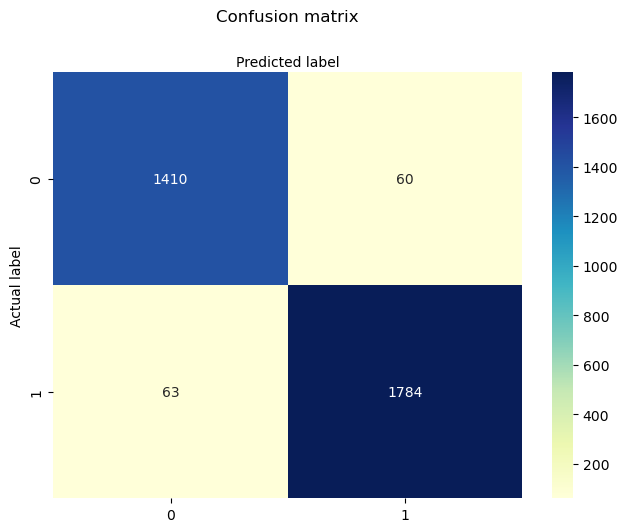

In [34]:
## visualizing the confusion matrix
class_names=[-1, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# creating heatmap
sns.heatmap(pd.DataFrame(conf_mat_dt), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [35]:
## accuracy , precison and recall score report
print("Accuracy", metrics.accuracy_score(y_test, y_pred_dt))
print("Precision", metrics.precision_score(y_test, y_pred_dt))
print("Recall", metrics.recall_score(y_test, y_pred_dt))
## checking precision recall, and accuracy report
print(classification_report(y_test, y_pred_dt))

Accuracy 0.962918299668375
Precision 0.9674620390455532
Recall 0.9658906334596643
              precision    recall  f1-score   support

          -1       0.96      0.96      0.96      1470
           1       0.97      0.97      0.97      1847

    accuracy                           0.96      3317
   macro avg       0.96      0.96      0.96      3317
weighted avg       0.96      0.96      0.96      3317



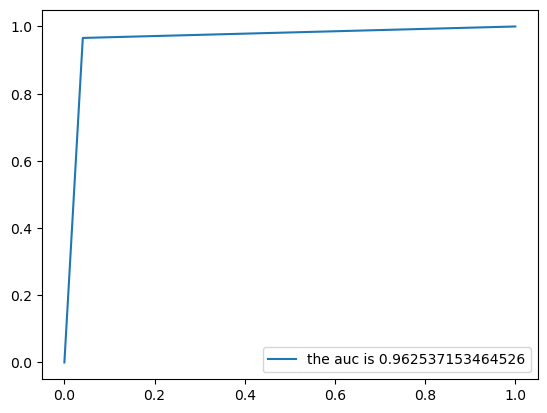

In [36]:
## ploting ROC curve
fpr,tpr,thresh = roc_curve(y_test, y_pred_dt)

auc = metrics.roc_auc_score(y_test, y_pred_dt)
plt.plot(fpr, tpr, label='the auc is ' + str(auc))
plt.legend(loc=4)
plt.show()

### Applying K Nearest Neighbours

In [37]:
# creating and training the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(n_neighbors=3)

In [38]:
# making predictions
## make predictions with X_test
y_pred_knn = knn.predict(X_test)
y_pred_knn

array([ 1,  1,  1, ...,  1,  1, -1])

In [39]:
## evaluation with confusion matrix
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)
print(conf_mat_knn)

[[1385   85]
 [  86 1761]]


Text(0.5, 427.9555555555555, 'Predicted label')

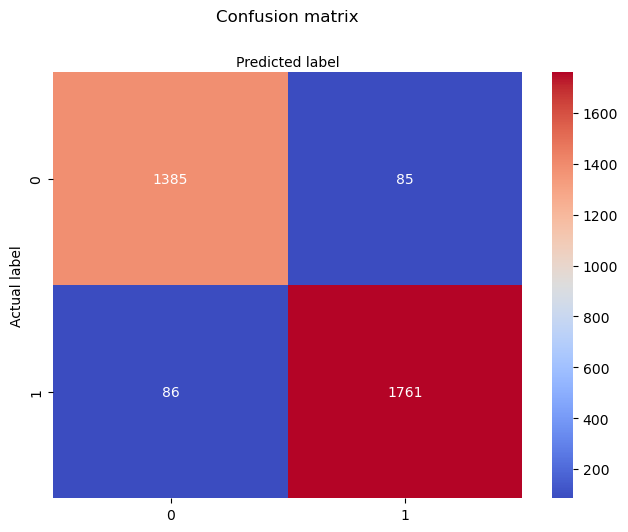

In [40]:
## visualizing the confusion matrix
## visualize the confusion matrix
class_names=[-1,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# creating heatmap
sns.heatmap(pd.DataFrame(conf_mat_knn), annot=True,cmap='coolwarm', fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [41]:
## accuracy , precison and recall score report
print("Accuracy", metrics.accuracy_score(y_test, y_pred_knn))
print("Precision", metrics.precision_score(y_test, y_pred_knn))
print("Recall", metrics.recall_score(y_test, y_pred_knn))

Accuracy 0.9484473922218872
Precision 0.9539544962080173
Recall 0.9534380075798592


In [42]:
## checking precision recall, and accuracy
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

          -1       0.94      0.94      0.94      1470
           1       0.95      0.95      0.95      1847

    accuracy                           0.95      3317
   macro avg       0.95      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317



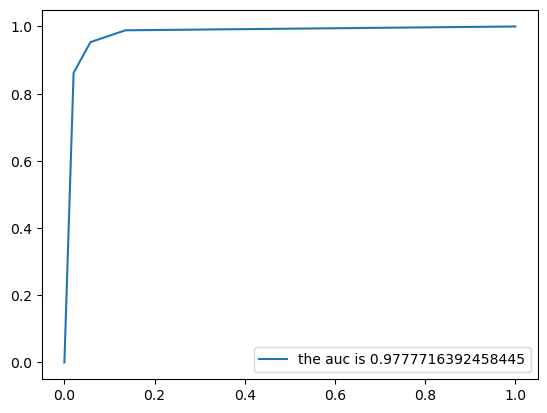

In [43]:
## ploting ROC curve
prob_y_pred = knn.predict_proba(X_test)[::,1]  
fpr, tpr, _ = metrics.roc_curve(y_test, prob_y_pred) 
auc = metrics.roc_auc_score(y_test, prob_y_pred)
plt.plot(fpr, tpr, label='the auc is ' + str(auc))
plt.legend(loc=4)
plt.show()